In [5]:
from helpers.step_metrics import calculate_step_metrics
from agents.train_agent import mask_invalid_actions
import numpy as np
import gym
import gym_battleship
from tf_agents.environments import suite_gym, tf_py_environment
import tensorflow as tf
from matplotlib import pyplot as plt

In [6]:
board_size = (10, 10)
ship_sizes = {5: 1, 4: 1, 3: 2, 2: 1}

reward_dictionary = {
    'win': 100,  # for sinking all ships
    'missed': -1,  # for missing a shot
    'hit': 5,  # for hitting a ship
    'repeat_missed': -10,  # for shooting at an already missed cell
    'repeat_hit': -10  # for shooting at an already hit cell
}
E = {
    'ship_sizes': ship_sizes,
    'board_size': board_size,
    'episode_steps': np.prod(board_size),  # Number of steps until the episode terminates
    'reward_dictionary': reward_dictionary,
    'get_invalid_action_mask': True
}

In [7]:
py_env = suite_gym.load('Battleship-v0', gym_kwargs=E)
tf_env = tf_py_environment.TFPyEnvironment(py_env)

saved_policy = tf.compat.v2.saved_model.load(f"../training/data/1_tuning/2022-03-14T21-01-03-10x10-promising-cnns/policies/1")
policy_state = saved_policy.get_initial_state(batch_size=1)

s_min, s_max, s_mean, s_median, s_history  = calculate_step_metrics(tf_env, saved_policy, num_episodes=10_000)
print(f'Metrics: min:{s_min}, max: {s_max}, mean: {s_mean}, median: {s_median}')

100%|██████████| 10000/10000 [39:17<00:00,  4.24it/s]

Metrics: min:24, max: 100, mean: 78.6711, median: 80.0


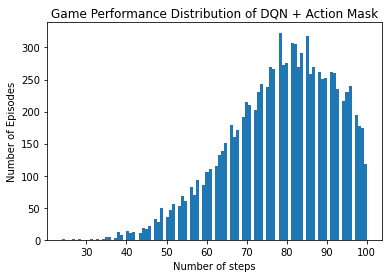

In [8]:
n_bins = 100
plt.hist(s_history,bins=n_bins)

plt.ylabel('Number of Episodes')
plt.xlabel('Number of steps')
plt.title(f'Game Performance Distribution of DQN + Action Mask')

plt.show()